# EDA

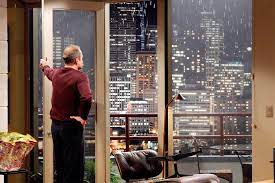

In [90]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import airportsdata as airports

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

import airportsdata
airports = airportsdata.load()  # key is ICAO code, the default
#print(airports['KJFK'])


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from optional.feature_engineering import *
from optional.prepare_flight_data import *

In [91]:
# Loading the data in and Shape to fit
airports = pd.DataFrame(airports).T.reset_index(drop=True)
# test data
train_df = pd.read_csv("data/Train.csv")
# train data
test_df = pd.read_csv("data/Test.csv")

# Print all of them for overview
print("==="*40)
print('\033[1m'+"Airport data"+ '\033[0m')
display(airports.head())
print()
print("==="*40)
print('\033[1m'+"Training data"+ '\033[0m')
display(train_df.head())
print()
print("==="*40)
print('\033[1m'+"Test data"+ '\033[0m')
display(test_df.head())

Airport data


,icao,iata,name,city,subd,country,elevation,lat,lon,tz
0,00AK,,Lowell Field,Anchor Point,Alaska,US,450.000,59.949,-151.696,America/Anchorage
1,00AL,,Epps Airpark,Harvest,Alabama,US,820.000,34.865,-86.770,America/Chicago
2,00AZ,,Cordes Airport,Cordes,Arizona,US,3810.000,34.306,-112.165,America/Phoenix
3,00CA,,Goldstone /Gts/ Airport,Barstow,California,US,3038.000,35.350,-116.888,America/Los_Angeles
4,00CO,,Cass Field,Briggsdale,Colorado,US,4830.000,40.622,-104.344,America/Denver



Training data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.000
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.000
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.000
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.000
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.000



Test data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [92]:
print(train_df["DATOP"].min())
print(train_df["DATOP"].max())

2016-01-01
2018-12-31


In [93]:
# Getting an idea of the dimension
print('Number of rows in the flightdata dataset : ',train_df.shape[0])
print('Number of columns in the flightdata dataset : ',train_df.shape[1])

Number of rows in the flightdata dataset :  107833
Number of columns in the flightdata dataset :  10


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [95]:
# import from script files folder feature engineering script
missing_values_table(train_df)

Your selected dataframe has 10 columns and 107833 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero and Missing Values,Data Type


In [96]:
# All continuous variables
train_df.select_dtypes("object").columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC'],
      dtype='object')

In [97]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,107833.000,48.733,117.136,0.000,0.000,14.000,43.000,3451.000


In [98]:
# Berlin Schönefeld is referenced as SXF in the data, but only exists as BER in the airports data. Therefore we replace SXF with BER. from the prepare flights script
train_df = fix_airport(train_df)
test_df = fix_airport(test_df)

In [99]:
# Overview if everything goes well
train_airport_df["FLTID"].sample(10).unique()

array(['TU 0750 ', 'TU 0251 ', 'TU 0643 ', 'TU 0928 ', 'TU 0214 ',
       'TU 0282 ', 'TU 0789 ', 'TU 0725 ', 'TU 0701 ', 'TU 0723 '],
      dtype=object)

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# Import airport data
import airportsdata
airports = airportsdata.load()

# Import scripts
from optional.feature_engineering import *
from optional.prepare_flight_data import *

In [101]:
# Customize color palette for presentation
colors_palette = ["#fa7256", "#f7d380","#ff4b41","#f89649","#f8b179"]

sns.set_palette(palette=colors_palette)

In [ ]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Miami

# Set time period
start = datetime(1992, 8, 1)
end = datetime(1992, 8, 31)

# Create Point for Vancouver, BC
miami = Point(25.79319953918457, -80.29060363769531)

# Get daily data for 2018
data = Daily(miami, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['wspd', 'wpgt', 'prcp'])
plt.show()

In [104]:
# Overview if everything goes well
train_df["FLTID"].sample(10).unique()

array(['TU 0669 ', 'TU 0217 ', 'TU 0711 ', 'TU 0745 ', 'TU 0606 ',
       'TU 6025 ', 'TU 0714 ', 'TU 0756 ', 'TU 0527 ', 'TU 7174 '],
      dtype=object)

In [105]:
print(train_df["DATOP"].min())
print(train_df["DATOP"].max())

2016-01-01
2018-12-31


In [106]:
# Getting an idea of the dimension
print('Number of rows in the flightdata dataset : ',train_df.shape[0])
print('Number of columns in the flightdata dataset : ',train_df.shape[1])

Number of rows in the flightdata dataset :  107833
Number of columns in the flightdata dataset :  10


In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [108]:
# import from script files folder feature engineering script
missing_values_table(train_df)

Your selected dataframe has 10 columns and 107833 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero and Missing Values,Data Type


In [109]:
# All continuous variables
train_df.select_dtypes("object").columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC'],
      dtype='object')

In [110]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,107833.000,48.733,117.136,0.000,0.000,14.000,43.000,3451.000


In [113]:
# Berlin Schönefeld is referenced as SXF in the data, but only exists as BER in the airports data. Therefore we replace SXF with BER. from the prepare flights script
train_df = fix_airport(train_df)
test_df = fix_airport(test_df)

In [119]:
df_air =airports

In [120]:
# Merge airportsdata function from the prepare flights script
train_airport_df = merge_airports(train_df,airports)
test_airport_df = merge_airports(test_df,airports)

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [115]:
train_airport_df["FLTID"].sample(10).unique()

array(['TU 0726 ', 'TU 0399 ', 'TU 0711 ', 'TU 0751 ', 'TU 0753 ',
       'WKL 0000 ', 'TU 0374 ', 'TU 0247 ', 'TU 0216 ', 'TU 0790 '],
      dtype=object)

In [ ]:
train_airport_df.columns